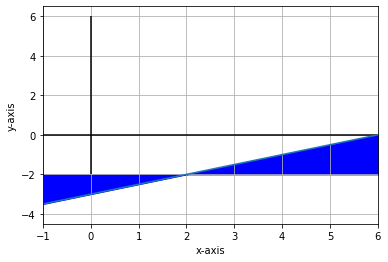

In [8]:
# 3.1 - Graphing Linear Inequalities
import matplotlib.pyplot
from matplotlib.pyplot import *
import numpy
from numpy import arange

# This generates a range for the x-axis of [-2,6.1) with intervals of 0.1
x = arange (-2,6.1,0.1)

y = 0.5*x - 3

# Plot limits must be set for the graph.
xlim(-1,6)
# Plot axes must be specified.
xlabel('x-axis')
ylabel('y-axis')
hlines(0,-2,6,color ='black')
vlines(0,-2,6,color='black')
grid(True)
plot(x,y)

# Now, another equation sets the boundaries of the inequality, using Z
z = -2.0 + 0.0*x

#Input shading
fill_between(x,y,z, color = 'b')
show()

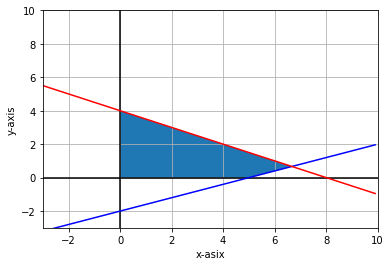

In [11]:
# 3.1 - Graphing Linear Inequalites (Plausible Region)

figure()
x = arange(-3,10,0.1)
y = arange(-3,10.1,0.1)
y1 = 0.4*x - 2.0
y2 = 4.0 - 0.5*x

xlim(-3,10)
ylim(-3,10)
hlines(0,-3,10,color='k')
vlines(0,-3,10,color='k')
grid(True)

xlabel('x-asix')
ylabel('y-axis')

plot(x,y1,color='b')
plot(x,y2,color='r')

# The critical points can be entered as arrays, and these points will be filled in
x = [0.0,0.0,6.67,5.0]
y = [0.0,4.0,0.67,0.0]
fill(x,y)
show()

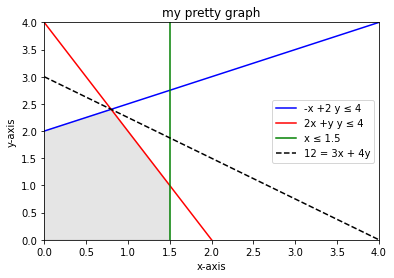

In [16]:
# 3.2 - Solving Linear Programming Models Graphically

import matplotlib.pyplot
from matplotlib.pyplot import *
import numpy
from numpy import *

# The LP problem is:
# Maximize z = 3x + 4y, subject to:
# 2x + y /< 4
# -x + 2y /< 4
# x /< 1.5, x /> 0, y /> 0 

# Setting up the system:
x=arange(0,4.1,0.1)
y0=arange(0,4.1,0.1)
y1 = 4.0 - 2.0*x
y2 = 2.0 + x/2.0
y = 3 - 0.75*x
x1 = 1.5 + 0.0*y0 #This is to enter the constraint on x

# Plot limits must be set for the graph and axes must be established
xlim(0,4)
ylim(0,4)
xlabel('x-axis')
ylabel('y-axis')
title('my pretty graph')

plot(x,y2,'b',label = '-x +2 y ≤ 4')
plot(x,y1,'r',label = '2x +y y ≤ 4')
plot(x1,y0,'g',label = 'x ≤ 1.5')
plot(x,y,'k--',label = '12 = 3x + 4y')
legend()

#Next, enter the critical points
x = [0,0,0.8,1.5,1.5]
y = [0,2,2.4,1,0]
fill(x,y,color='grey',alpha=0.2)
show()

In [20]:
# 3.2 - Solving Linear Programming Models Graphically

# The matrix can then by analzed to show the values of the objective
# function at the critical points

obj = matrix([3.0,4.0])
obj = transpose(obj)
corners = matrix ([x,y])
corners = transpose(corners)
result = dot(corners,obj)
result

matrix([[ 0. ],
        [ 8. ],
        [12. ],
        [ 8.5],
        [ 4.5]])

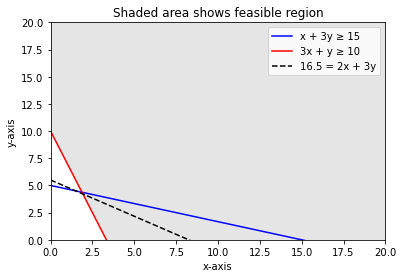

In [25]:
# 3.3 - More on Linear Programming Models

import matplotlib.pyplot
from matplotlib.pyplot import *
import numpy
from numpy import *

# Setting up the system:
# Objective Function: z = 2x + 3y
# x + 3y ≥ 15
# 3x + y ≥ 10
# x ≥ 0, y ≥ 0

x = arange(0,20.1,0.1)
y0 = arange(0,20.1,0.1)
y1 = 10.0 - 3.0*x
y2 = 5.0 - x/3.0
y3 = 20 + 0.0*x #This definition allows for filling of unbounded region

# The maximum can be defined as an array
y4 = list()
for y4_val, y2_val in zip(y1,y2):
    y4_max = max([y1_val, y2_val])
    y4.append(y4_val)
    
# The obejctive function can be plotted for visual sake
y5 = 5.5 - 2.0*x/3.0 

xlim(0,20)
ylim(0,20)
xlabel('x-axis')
ylabel('y-axis')
title('Shaded area shows feasible region')
plot(x,y2,color = 'b', label = 'x + 3y ≥ 15')
plot(x,y1,color = 'r', label = '3x + y ≥ 10')
plot(x,y5,'k--', label = '16.5 = 2x + 3y')
legend()
fill_between(x,y3,y4,color='grey',alpha=0.2)
show()

In [30]:
# 3.3 - More on Linear Programming

# Create critical points as a matrix to be solved
x=[0,1.5,15]
y=[10,4.5,0]
obj = matrix([2.0,3.0])
obj = transpose(obj)
corners = matrix([x,y])
corners = transpose(corners)
result = dot(corners,obj)
print('Result is:\n',result)

Result is:
 [[30. ]
 [16.5]
 [30. ]]


In [55]:
# 3.4 - Solving Linear Programming Models Using Pulp or SciPy

# Setting up system:
# Objective Function: z = 10x1 + 15x2 + 10x3 + 5x4
# x1 + x2 + x3 + x4 ≤ 300
# x1 + 2x2 + 3x3 + x4 ≤ 360
# Non-negative constraints
# Objective function is to be maximized, solution is z = 3000 at
# x1 = 240, x2 = 60, x3 = 0, x4 = 0

# Method 1 using linprog from Scipy.optimize
from scipy.optimize import linprog

# Create arrays that represent the objective function coefficients,
# and left / right hand side of constraints
z = [-10,-15,-10,-5]
lhs = [[1,1,1,1],[1,2,3,1]]
rhs = [300,360]

# Set boundaries for variables using non-negative constraints
x1_bound = (0,None)
x2_bound = (0,None)
x3_bound = (0,None)
x4_bound = (0,None)

solution = linprog(c=z, A_ub=lhs, b_ub = rhs, bounds = (x1_bound,x2_bound,x3_bound,x4_bound),method='simplex')
print('Optimized value =',solution.fun, '\nX values are:',solution.x)

Optimized value = -3300.0 
X values are: [240.  60.   0.   0.]


In [1]:
# Module 3 Discussion Post

from scipy.optimize import linprog

# Setting up the system:
# Objective function: 20x1 + 50x2 = i
# Constraints:
# x1 + x2 ≤ 70
# x1 - 2x2 ≥ 0
# x ≥ 0, y ≥ 0

i = [20,50]
lhs = [[-1,-1],[1,-2]]
rhs = [-70,0]

x1_bound = (0,None)
x2_bound = (0,None)

solution = linprog(c=i, A_ub=lhs, b_ub=rhs, bounds=(x1_bound,x2_bound),method='simplex')

print('Maximum Income:',round(solution.fun))
print('\nOptimal Number of Hours Spent Working and Studying:',solution.x)

Maximum Income: 2100.0

Optimal Number of Hours Spent Working and Studying: [46.66666667 23.33333333]


In [2]:
# Module 3 Discussion Post

from scipy.optimize import linprog

# Setting up the system:
# Objective function: 20x1 + 50x2 = i
# Constraints:
# x1 + x2 ≤ 70
# x1 - 2x2 ≥ 0
# x ≥ 0, y ≥ 0

i = [-20,-18.79]
lhs = [[1,1],[1,-2]]
rhs = [70,0]

x1_bound = (0,None)
x2_bound = (0,None)

solution = linprog(c=i, A_ub=lhs, b_ub=rhs, bounds=(x1_bound,x2_bound),method='simplex')

print('Maximum Income:',round(solution.fun))
print('\nOptimal Number of Hours Spent Working and Studying:',solution.x)

Maximum Income: -1372.0

Optimal Number of Hours Spent Working and Studying: [46.66666667 23.33333333]


In [4]:
# Now, I thought I would have some additional fun with this post. In reality, I do not earn $50/hour studying. In fact, I probably pay at least that in tuition. Additionally, I do not earn the payoff of studying and completing this program until I graduate, so the economic benefits of studying are deferred. Thus, this model isn't actually all that realistic. But, I think it can be improved by using a method integral to finance called Time Value of Money Analysis. The Time Value of Money is an idea stating that a dollar today is worth more than a dollar tomorrow, as money today can be invested, and people are generally impatient. TMA analysis uses interest rates and discount rates to determine the "Present Value" of cash flows in the future. Essentially, the present value of a future cash flow is equal to its dollar amount times (1 / 1 + r)^n, where r = interest rate and n = number of periods of time. The net present value of an investment is equal to the combined present value of all future cash flows minus initial investment. 

# Using this theory, I will determine a more realistic economic benefit to studying. Say I complete this program in one year, tuition is equal to $55,000 (which I pay at the beginning of the first semester), and my first year salary upon graduation is $100,000 (which I am paid at signing.) Additionally, let's say the current interest rate that I can earn is 8%. Thus, the net present value of this program is 100,000 * (1 / 1+0.08)^1 - 55,000 = 37,592.59. At 40 hours per week, for 50 weeks a year, that comes out to 18.79. I will not use this figure to calculate a new solution.

# The results are: 

In [5]:
# Current salary is 40,000, wage = $20/hour
# 100 - 55 = 45,000, wage = $45/hour
# 